In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
START = "2023-09-01"
END = "2024-09-01"
ticker = "QQQ"

# spy = yf.Ticker("SPY")

stock_df = yf.download(ticker, start=START, end=END)
stock_df = stock_df.xs(ticker, level='Ticker', axis=1)


stock_df['time_published'] = stock_df.index
stock_df['time_published'] = pd.to_datetime(stock_df['time_published'])
stock_df['time_published'] = stock_df['time_published'].dt.date
display(stock_df)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,time_published
Date,,,,,,,
2023-09-01,374.475830,377.589996,380.829987,376.079987,380.399994,39772400,2023-09-01
2023-09-05,374.951935,378.070007,379.309998,375.829987,376.769989,32344200,2023-09-05
2023-09-06,371.649353,374.739990,377.630005,372.700012,377.279999,42998700,2023-09-06
2023-09-07,368.991486,372.059998,372.850006,369.149994,370.209991,52060700,2023-09-07
2023-09-08,369.507172,372.579987,374.850006,371.600006,372.010010,35800100,2023-09-08
...,...,...,...,...,...,...,...
2024-08-26,474.672974,475.339996,480.380005,473.239990,479.450012,27452600,2024-08-26
2024-08-27,476.090973,476.760010,477.839996,471.709991,473.690002,27510000,2024-08-27
2024-08-28,470.688568,471.350006,477.019989,467.890015,476.290009,37372400,2024-08-28


In [6]:
news_df = pd.read_csv('technology_news_data_50Daily.csv')
news_df['time_published'] = pd.to_datetime(news_df['time_published'])
news_df['time_published'] = news_df['time_published'].dt.date
news_df = news_df[news_df['title'] != 'Before you continue']


df1 = stock_df[['time_published', 'Adj Close', 'Open']]
df2 = news_df[['time_published', 'source', 'overall_sentiment_score']]
average_sentiment_df = df2.groupby(['time_published', 'source'], as_index=False)['overall_sentiment_score'].mean()
average_sentiment_df.rename(columns={'overall_sentiment_score': 'average sentiment score'}, inplace=True)
pivot_df = average_sentiment_df.pivot(index='time_published', columns='source', values='average sentiment score')
pivot_df.reset_index(inplace=True)
pivot_df.fillna(-1, inplace=True)
combined_df = pd.merge(df1, pivot_df, on='time_published', how='inner')
# # combined_df['time_published'] = pd.to_datetime(combined_df['time_published'])
# # combined_df['time_published'] = (combined_df['time_published'] - pd.to_datetime('1970-01-01')).dt.days
# df_encoded = pd.get_dummies(combined_df, columns=['source'])
# display(df_encoded)
display(combined_df)

,time_published,Adj Close,Open,Al Jareeza,Associated Press,Barrons,Benzinga,Business Insider,Business Standard,CNBC,...,StockMarket.com,Stocknews.com,The Atlantic,The Economist,The Financial Express,The Street,The Week News,UPI Business,Wall Street Journal,Zacks Commentary
0,2023-09-01,374.475830,380.399994,-1.0,0.011936,0.152958,0.173515,0.156254,-1.0,-0.108245,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.193063
1,2023-09-05,374.951935,376.769989,-1.0,-0.043037,-1.000000,0.224852,0.113085,-1.0,0.080024,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.204264
2,2023-09-06,371.649353,377.279999,-1.0,0.062341,0.097872,0.255724,0.073166,-1.0,-0.037002,...,-1.0,-1.0,0.114045,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.175756
3,2023-09-07,368.991486,370.209991,-1.0,0.230936,-1.000000,0.206763,-0.019377,-1.0,-0.107900,...,-1.0,-1.0,0.159195,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.214652
4,2023-09-08,369.507172,372.010010,-1.0,-0.041194,-1.000000,0.163066,0.079105,-1.0,-1.000000,...,-1.0,-1.0,-1.000000,-1.0,-1.0,0.209266,-1.0,-1.0,-1.0,0.198217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2024-08-26,474.672974,479.450012,-1.0,-1.000000,-1.000000,0.195866,-1.000000,-1.0,0.125910,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.169621
247,2024-08-27,476.090973,473.690002,-1.0,-1.000000,-1.000000,0.190242,-1.000000,-1.0,0.077878,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.176734
248,2024-08-28,470.688568,476.290009,-1.0,-1.000000,-1.000000,0.215394,-1.000000,-1.0,0.243668,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.170518
249,2024-08-29,469.999542,473.279999,-1.0,-1.000000,-1.000000,0.212961,-1.000000,-1.0,0.087253,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.176690


# Data Preparation

In [7]:
# List of columns representing sentiment scores
news_sentiment_columns = [
    'Al Jareeza', 'Associated Press', 'Barrons', 'Benzinga', 'Business Insider',
    'Business Standard', 'CNBC', 'CNN', 'Canada Newswire', 'Cointelegraph',
    'Decrypt.co', 'Financial News London', 'Financial Times', 'Forbes',
    'Fox Business News', 'GlobeNewswire', 'Investing News Network',
    'Investor Ideas', 'Investors Business Daily', 'Kiplinger', 'MarketWatch',
    'Money Control', 'Money Morning', 'Motley Fool', 'New York Times',
    'PR Newswire', 'PennyStocks.com', 'Reuters', 'South China Morning Post',
    'StockMarket.com', 'Stocknews.com', 'The Atlantic', 'The Economist',
    'The Financial Express', 'The Street', 'The Week News', 'UPI Business',
    'Wall Street Journal', 'Zacks Commentary'
]

# Calculate the mean sentiment across all news sources
combined_df['aggregate_sentiment_mean'] = combined_df[news_sentiment_columns].mean(axis=1)

# Calculate other possible aggregation metrics (optional)
combined_df['aggregate_sentiment_median'] = combined_df[news_sentiment_columns].median(axis=1)
combined_df['aggregate_sentiment_std'] = combined_df[news_sentiment_columns].std(axis=1)

# Fill missing values with 0 before aggregation
combined_df[news_sentiment_columns] = combined_df[news_sentiment_columns].fillna(0)

# Recalculate the mean sentiment
combined_df['aggregate_sentiment_mean'] = combined_df[news_sentiment_columns].mean(axis=1)


print(combined_df[['time_published', 'aggregate_sentiment_mean']].head())

  time_published  aggregate_sentiment_mean
0     2023-09-01                 -0.580023
1     2023-09-05                 -0.552526
2     2023-09-06                 -0.548218
3     2023-09-07                 -0.496186
4     2023-09-08                 -0.701866


# Neural Network for next few days of data

In [62]:
# Create rolling features for sentiment values
for i in range(1, 11):  # 10 rolling days
    combined_df[f'sentiment_mean_day_{i}'] = combined_df['aggregate_sentiment_mean'].shift(i)
    combined_df[f'sentiment_median_day_{i}'] = combined_df['aggregate_sentiment_median'].shift(i)
    combined_df[f'sentiment_std_day_{i}'] = combined_df['aggregate_sentiment_std'].shift(i)

# Create target values for the next 5 days of sentiment mean
for i in range(1, 6):  # Predict the next 5 days
    combined_df[f'sentiment_target_day_{i}'] = combined_df['Adj Close'].shift(-i)

# Drop rows with NaN values after shifting
combined_df = combined_df.dropna()

# Prepare features (X) and labels (y)
feature_columns = [f'sentiment_mean_day_{i}' for i in range(1, 11)] + \
                  [f'sentiment_median_day_{i}' for i in range(1, 11)] + \
                  [f'sentiment_std_day_{i}' for i in range(1, 11)]
target_columns = [f'sentiment_target_day_{i}' for i in range(1, 6)]

X = combined_df[feature_columns].values
y = combined_df[target_columns].values

# Print the shapes of features and labels
print("Features (X):", X.shape)
print("Labels (y):", y.shape)

Features (X): (132, 30)
Labels (y): (132, 5)


In [63]:
# Prepare features (X) and labels (y)
X = combined_df[feature_columns].values  # Features from the last 10 days
y = combined_df[target_columns].values   # Targets for the next 5 days

# Train-test split (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

# Print shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Training Labels (y_train):", y_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Testing Labels (y_test):", y_test.shape)

Training Features (X_train): (105, 30)
Training Labels (y_train): (105, 5)
Testing Features (X_test): (27, 30)
Testing Labels (y_test): (27, 5)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 182603.3750 - val_loss: 195968.2031
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 182229.5469 - val_loss: 195847.4062
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 182973.9844 - val_loss: 195729.5938
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 182345.8594 - val_loss: 195573.7500
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 181763.3750 - val_loss: 195375.5938
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 182403.2188 - val_loss: 195124.1250
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 182042.6094 - val_loss: 194788.0625
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 181602.3438 - val_loss: 194354.4062
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 182029.7812 - val_loss: 193809.5781
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 180828.6875 - val_loss: 193110.9062
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 179449.2031 

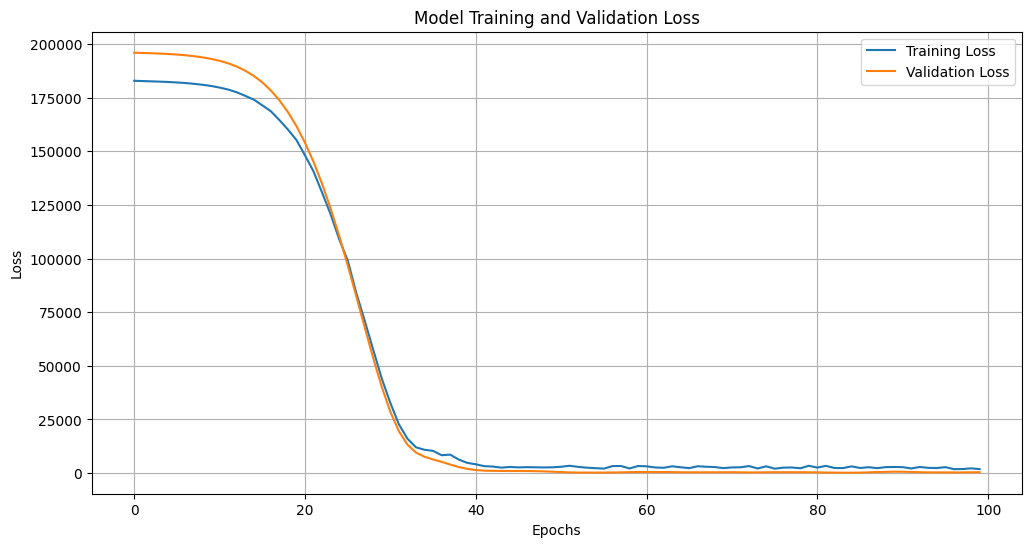

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer (30 features)
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(5)  # Output layer: Predict 5 future sentiment values
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

# Generate predictions for the test set
predicted_prices_test = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, predicted_prices_test)

# Calculate R-squared
r2 = r2_score(y_test, predicted_prices_test)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Mean Squared Error (MSE): 2700.169887746449
R-squared (R^2): -14.45821378263783


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Sentiments for the next 5 days: [418.07867 418.08093 418.2052  418.601   418.86142]


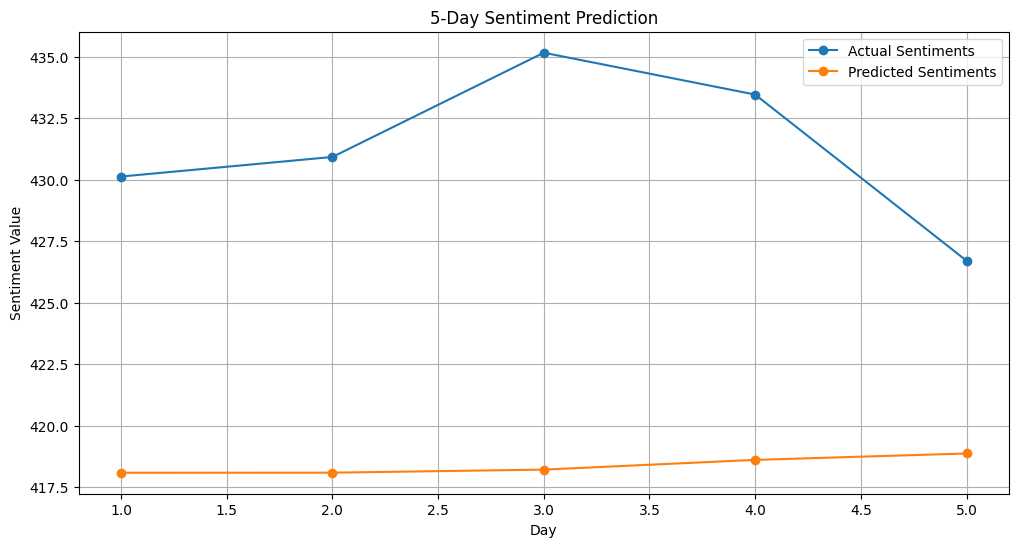

In [66]:
# Predict for a single example
sample_input = X[0].reshape(1, -1)  # Reshape for prediction
predicted_sentiments = model.predict(sample_input)
print("Predicted Sentiments for the next 5 days:", predicted_sentiments[0])

# Visualization of predicted vs actual
actual_sentiments = y[30]  # Corresponding actual sentiments

plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), actual_sentiments, label='Actual Sentiments', marker='o')
plt.plot(range(1, 6), predicted_sentiments[0], label='Predicted Sentiments', marker='o')
plt.xlabel('Day')
plt.ylabel('Sentiment Value')
plt.legend()
plt.title('5-Day Sentiment Prediction')
plt.grid(True)
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


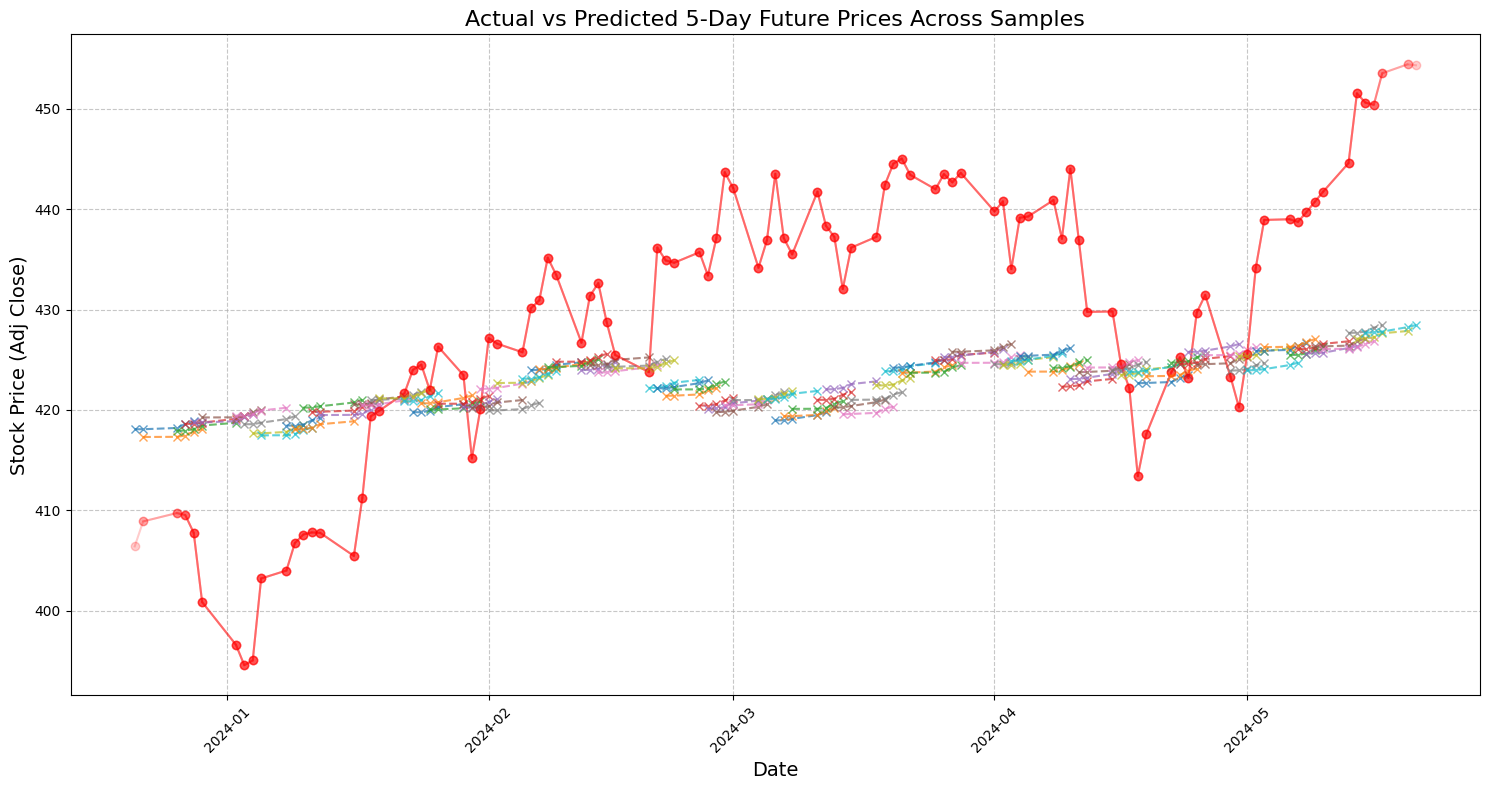

In [67]:
import matplotlib.pyplot as plt

# Generate predictions for the entire dataset
predicted_prices_all = model.predict(X)

# Use the dates from combined_df
dates = combined_df['time_published']  # Ensure this is a pandas Series of datetime.date objects

# Loop through the dataset to plot individual predictions
plt.figure(figsize=(15, 8))
for i in range(100):  # Plotting the first 20 samples for clarity
    # Get actual and predicted price values for this sample
    actual_prices = y[i]  # Actual 5-day future prices (modify y to reflect actual price targets)
    predicted_prices = predicted_prices_all[i]  # Predicted 5-day future prices

    # Select corresponding dates for the plot
    date_range = dates.iloc[i:i+5]  # Get the next 5 dates

    # Plot actual and predicted prices
    plt.plot(date_range, actual_prices, label=f'Actual {i+1}', linestyle='-', marker='o', alpha=0.2, color = 'red')
    plt.plot(date_range, predicted_prices, label=f'Predicted {i+1}', linestyle='--', marker='x', alpha=0.7)

# Plot formatting
plt.title('Actual vs Predicted 5-Day Future Prices Across Samples', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price (Adj Close)', fontsize=14)
plt.xticks(rotation=45)  # Rotate dates for better readability
# plt.legend(loc='upper left', fontsize=8, ncol=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Use individual data sources instead of aggregate

In [60]:
# Create rolling features for the last 10 days of sentiment scores
for i in range(1, 11):  # 10 rolling days
    combined_df[f'sentiment_day_{i}'] = combined_df['aggregate_sentiment_mean'].shift(i)

# Create target values for the next 5 days of sentiment scores
for i in range(1, 6):  # Predict the next 5 days
    combined_df[f'sentiment_target_day_{i}'] = combined_df['aggregate_sentiment_mean'].shift(-i)

# Drop rows with NaN values after shifting
combined_df = combined_df.dropna()

# Prepare features (X) and labels (y)
feature_columns = [f'sentiment_day_{i}' for i in range(1, 11)]  # Last 10 days as features
target_columns = [f'sentiment_target_day_{i}' for i in range(1, 6)]  # Next 5 days as targets

X = combined_df[feature_columns].values  # Feature matrix
y = combined_df[target_columns].values  # Target matrix

# Print the shapes of features and labels
print("Features (X):", X.shape)
print("Labels (y):", y.shape)

Features (X): (147, 10)
Labels (y): (147, 5)


In [50]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Print the shapes of the train-test splits
print("Train Features (X_train):", X_train.shape)
print("Test Features (X_test):", X_test.shape)
print("Train Labels (y_train):", y_train.shape)
print("Test Labels (y_test):", y_test.shape)


Train Features (X_train): (165, 10)
Test Features (X_test): (42, 10)
Train Labels (y_train): (165, 5)
Test Labels (y_test): (42, 5)


In [53]:

# Construct the neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(128, activation='relu'),  # Hidden layer 1
    Dropout(0.2),
    Dense(64, activation='relu'),  # Hidden layer 2
    Dense(y_train.shape[1], activation='linear')  # Output layer (regression task)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Show progress during training
)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss (MSE):", loss)
print("Test Mean Absolute Error (MAE):", mae)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.3627 - mae: 0.5786 - val_loss: 0.2736 - val_mae: 0.4969
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1491 - mae: 0.3521 - val_loss: 0.0718 - val_mae: 0.2283
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0397 - mae: 0.1596 - val_loss: 0.0106 - val_mae: 0.0866
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mae: 0.1692 - val_loss: 0.0172 - val_mae: 0.1046
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0234 - mae: 0.1243 - val_loss: 0.0296 - val_mae: 0.1412
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0195 - mae: 0.1118 - val_loss: 0.0339 - val_mae: 0.1560
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0170 - mae: 0.1022 - val_loss: 0.0232 - val_mae: 0.1258
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0159 - mae: 0.1010 - val_loss: 0.0165 - val_mae: 0.1008
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0150 - mae: 0.0

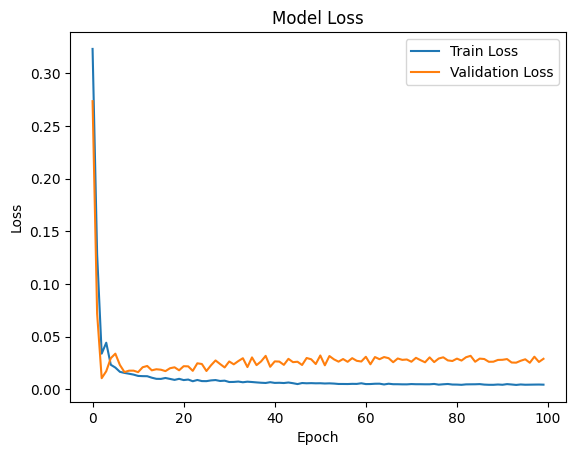

In [54]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted Sentiments for the next 5 days: [-0.54095495 -0.5556531  -0.55511236 -0.5295981  -0.5342716 ]


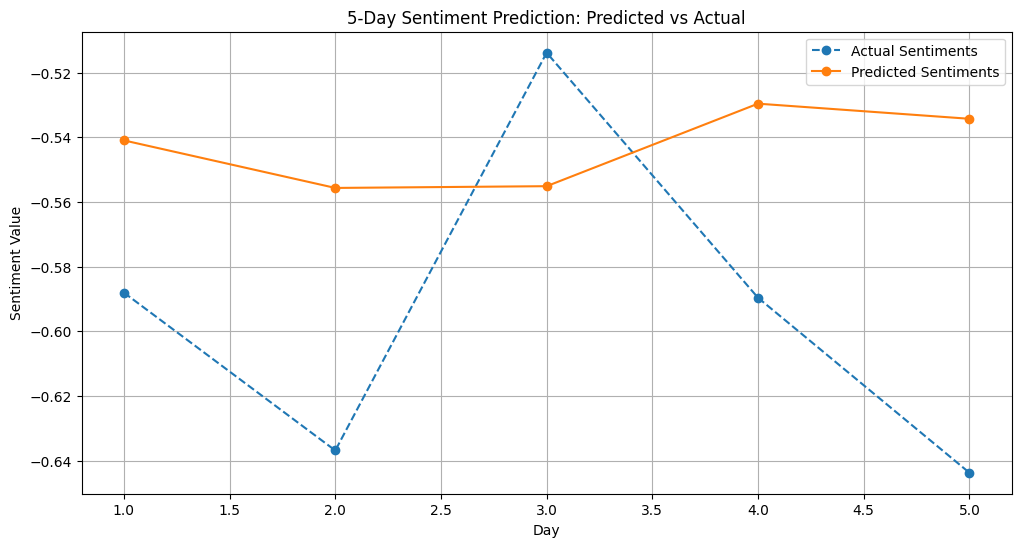

In [55]:
# Predict for a single example from the test set
sample_input = X_test[0].reshape(1, -1)  # Reshape the first test example for prediction
predicted_sentiments = model.predict(sample_input)
print("Predicted Sentiments for the next 5 days:", predicted_sentiments[0])

# Get the corresponding actual sentiments for comparison
actual_sentiments = y_test[0]  # Corresponding actual sentiments

# Visualization of predicted vs. actual sentiments
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), actual_sentiments, label='Actual Sentiments', marker='o', linestyle='--')
plt.plot(range(1, 6), predicted_sentiments[0], label='Predicted Sentiments', marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Sentiment Value')
plt.legend()
plt.title('5-Day Sentiment Prediction: Predicted vs Actual')
plt.grid(True)
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


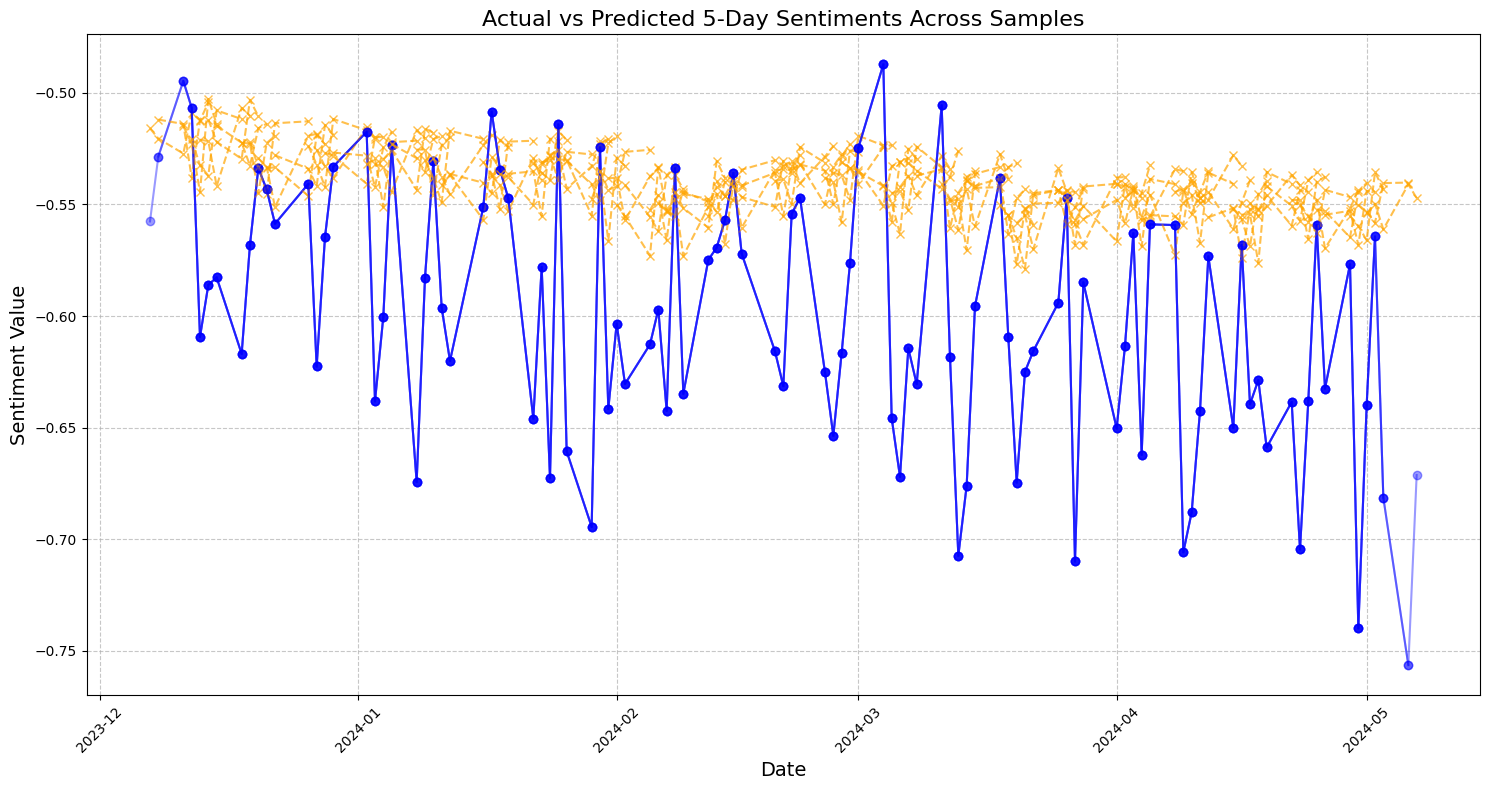

In [61]:
import matplotlib.pyplot as plt

# Generate predictions for the entire dataset
predicted_sentiments_all = model.predict(X)

# Use the dates from combined_df
dates = combined_df['time_published']  # Ensure this is a pandas Series of datetime.date objects

# Loop through the dataset to plot individual predictions
plt.figure(figsize=(15, 8))
for i in range(100):  # Plotting the first 20 samples for clarity
    # Get actual and predicted sentiment values for this sample
    actual_sentiments = y[i]  # Actual 5-day future sentiments
    predicted_sentiments = predicted_sentiments_all[i]  # Predicted 5-day future sentiments

    # Select corresponding dates for the plot
    date_range = dates.iloc[i:i+5]  # Get the next 5 dates

    # Plot actual and predicted sentiments
    plt.plot(date_range, actual_sentiments, label=f'Actual {i+1}', linestyle='-', marker='o', alpha=0.4, color='blue')
    plt.plot(date_range, predicted_sentiments, label=f'Predicted {i+1}', linestyle='--', marker='x', alpha=0.7, color='orange')

# Plot formatting
plt.title('Actual vs Predicted 5-Day Sentiments Across Samples', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sentiment Value', fontsize=14)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
